<a href="https://colab.research.google.com/github/Nikhithaprasannadurga/FMML-Labs/blob/main/FMML_Module4_Lab4_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4
## Lab 4: Support Vector Machines

In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

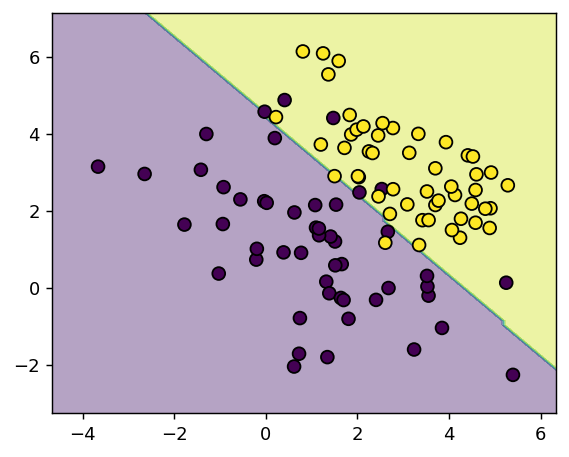

In [26]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

## Intuitive introduction to SVMs:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

Let us try to fall back to the well known dataset and see how SVMs perform on the iris dataset

In [25]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


Accuracy of the decision tree on the test set: 

0.921


The confusion matrix is : 


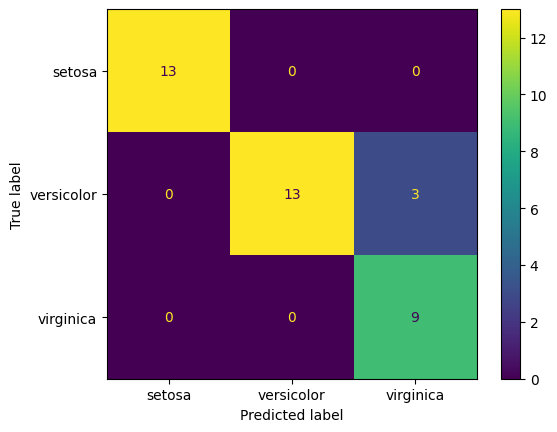

In [24]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

Now lets again try to see how does SVM perform when we give it just two of the features from the dataset

In [32]:
clf = svm.LinearSVC()
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3],clf)

IndexError: index 2 is out of bounds for axis 1 with size 2

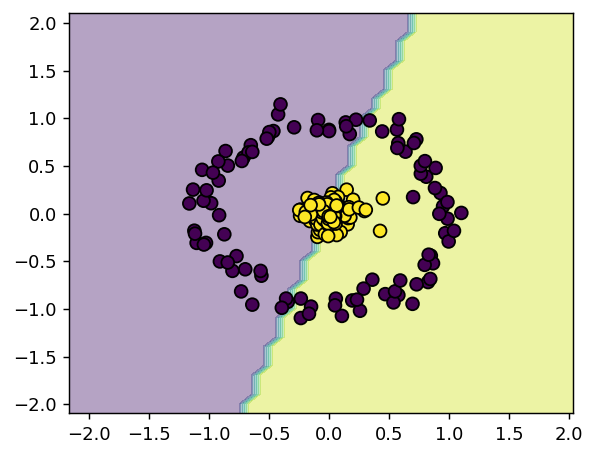

In [20]:
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

#### Alas! We see that SVMs are not able to classify the data in the above experiment because the data is not **linearly separable**

Thankfully, We have a neat trick up our sleeves that will help us to solve these problems. Let us take a look at a typical example that is used to illustrate this trick before we get back to the above dataset.

---

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


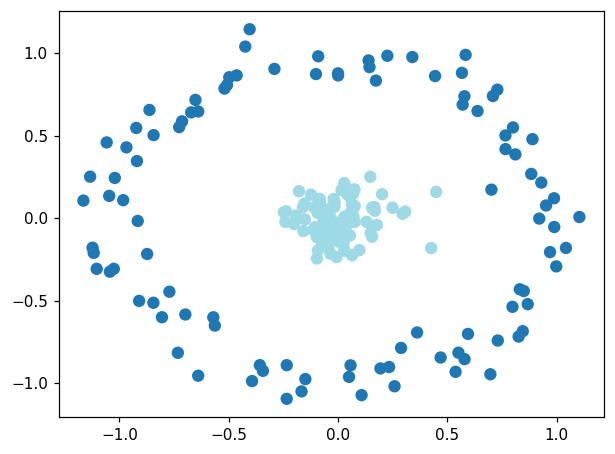

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

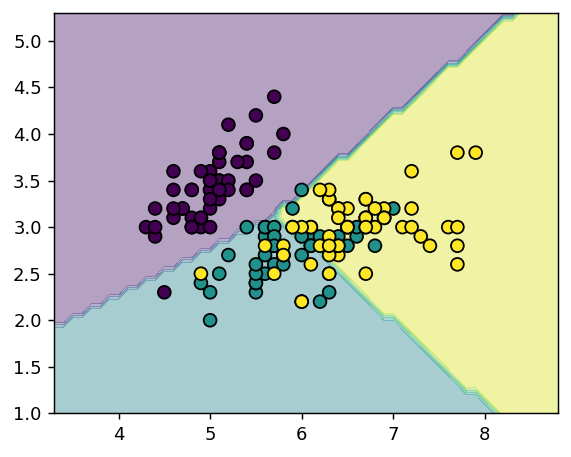

In [18]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [9]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [10]:
X_new = np.hstack((X, Z))

In [11]:
import plotly.graph_objects as go

In [17]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

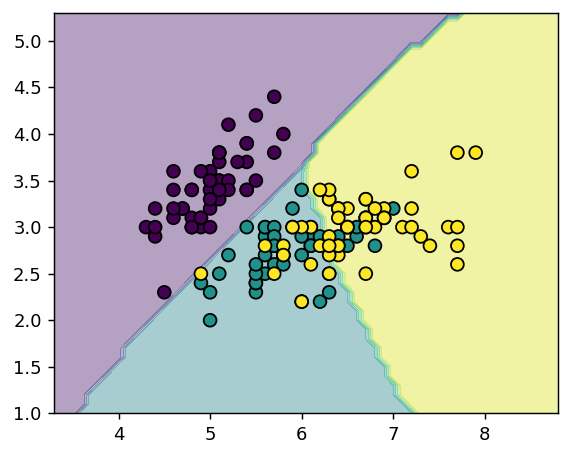

In [16]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 


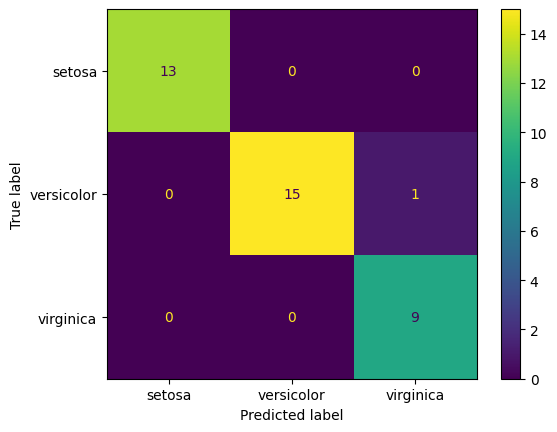

In [15]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

To run the experiment using different kernels for the Support Vector Machine (SVM) after filtering pairs of features, let's break the steps down into manageable tasks:

1. Feature Selection (Filtering Pairs of Features)

If you have a 2-dimensional feature space (x = [x1, x2]), there are only two features. However, the question asks to run experiments after filtering pairs of features 2 at a time. In this case, we can interpret that as a strategy where, for higher-dimensional data (if applicable), you can select combinations of features two at a time and analyze their performance.

In the case of 2 features, you don't need to filter any further, as the whole feature set would be used.


2. Different SVM Kernels

The SVM kernel determines the decision boundary and how the data is mapped to a higher-dimensional space. Here’s a breakdown of the kernels you can use:

Linear kernel: This is the simplest and is used when the data is linearly separable. It performs a linear classification.

Polynomial kernel (poly): A more flexible kernel that maps the data into higher dimensions using polynomial functions. It works well for non-linear problems where relationships between features are polynomial.

Radial Basis Function (RBF) kernel: This is one of the most commonly used kernels, especially for data that isn’t linearly separable. It uses the distance between data points in the feature space to create a non-linear decision boundary.

Sigmoid kernel: Similar to a neural network activation function, this kernel uses a sigmoid function to compute the decision boundary. It's less commonly used than the other kernels.

Precomputed kernel: In this case, you precompute the kernel matrix (a matrix of all pairwise distances between training samples) and pass that to the SVM. This is useful when you have a custom kernel or a non-standard setup.


3. Running the Experiment:

For each combination of features and kernel, the SVM will perform classification. Let's assume you're using a Python-based library such as scikit-learn. Below is a rough structure of how you would approach the experiment:

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification  # Example dataset

# Example: Create synthetic data (you can replace this with your actual data)
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

# Feature pairs (if you have more than 2 features, you can try all pairs of features)
feature_combinations = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# For each pair of features
for features in feature_combinations:
    X_filtered = X[:, features]  # Filter the data to only include these two features
    print(f"\nTraining with features {features}...")
    
    # Split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)
    
    for kernel in kernels:
        print(f"Using {kernel} kernel...")
        
        # Create and train the SVM model
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for kernel {kernel}: {accuracy:.4f}")

4. Interpretation of Results:

For each pair of features, you will:

Apply different kernels.

Train the SVM and test it using the chosen kernel.

Calculate and output the accuracy for each combination of kernel and feature pair.


5. Training and Test Data:

The dataset is split into training and testing sets. By splitting the data, you can estimate how well the SVM generalizes to new, unseen data.


6. Expected Outcome:

The accuracy for each kernel will vary based on the pair of features selected. Some kernels (e.g., rbf) might perform well with non-linearly separable data, while others (e.g., linear) will be best for linearly separable data.

You should evaluate the results based on accuracy and perhaps the training time for each kernel.


7. Leave-One-Out Cross-Validation (Optional):

You can also use leave-one-out cross-validation (LOO CV) to evaluate the performance of each kernel more robustly. This would involve testing each model on a single test sample and training on the rest of the data.

from sklearn.model_selection import LeaveOneOut

# Using LOO cross-validation
loo = LeaveOneOut()
for features in feature_combinations:
    X_filtered = X[:, features]
    for kernel in kernels:
        print(f"Using {kernel} kernel...")
        
        # Initialize SVM with the selected kernel
        model = SVC(kernel=kernel)
        
        # Perform LOO CV
        loo_accuracy = []
        for train_idx, test_idx in loo.split(X_filtered):
            X_train, X_test = X_filtered[train_idx], X_filtered[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            loo_accuracy.append(accuracy_score(y_test, y_pred))
        
        # Calculate mean LOO accuracy
        mean_accuracy = np.mean(loo_accuracy)
        print(f"Mean LOO accuracy for kernel {kernel}: {mean_accuracy:.4f}")

Conclusion:

The kernel choice significantly affects the performance of the SVM model. Some kernels (like rbf or poly) may work better with complex, non-linear data, while others (like linear) will be suited for linearly separable datasets.

Feature selection will help understand how different combinations of features impact classification accuracy.

## **Additional Critical Thinking Questions**

Consider    a   2-class classification  problem in  a   2-dimensional   feature space   x=[x1,  x2] with    target  variable    y=±1.   The training    data    comprises   7
samples as  shown   in  figure (4   black   diamonds    for the positive    class   and 3   white   diamonds    for the negative    class). The “maximum    margin  classifier”
(also   called  linear  “hard   margin” SVM)    is  a   classifier  that    leaves  the largest possible    margin  on  either  side    of  the decision    boundary.   The samples lying   on  the margin  are called  support vectors.

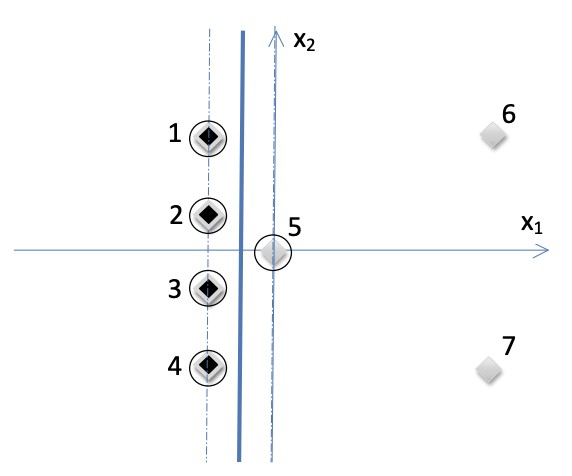


1. Draw the decision    boundary    obtained    by  the linear  hard
margin  SVM method  with    a   thick   solid   line.   Draw    the margins on  either  side with   thinner dashed  lines.  Identify    the support vectors.

2. What is  the training    error   rate?

3. The  removal of  which   sample  will    change  the decision    boundary?

4. What is  the leave-one-out   error   rate?

Let's address each part of your question step by step:

1. Draw the Decision Boundary and Margins

The decision boundary for a linear SVM is a straight line that separates the two classes. For a "hard margin" SVM, the boundary is chosen such that the margin (distance between the boundary and the closest samples from each class) is maximized. The samples closest to the decision boundary are called support vectors.

The thick solid line represents the decision boundary.

The dashed lines represent the margins, which are parallel to the decision boundary and positioned at equal distances from it. These margins are placed at the positions of the support vectors.

Support vectors are the samples from both classes that lie on the margin lines. These are critical in defining the decision boundary.


To visualize this, you would need the actual plot, but here's a conceptual breakdown:

The solid line is the decision boundary separating the two classes.

The dashed lines would be slightly offset from the boundary by a distance equal to the margin.

The support vectors lie on or just touch the dashed lines.


2. Training Error Rate

The training error rate is the proportion of misclassified samples in the training set. For a "hard margin" SVM, there should be no misclassifications as long as the data is linearly separable. In other words, the classifier will perfectly classify all training samples.

Training error rate = 0 (assuming the data is separable and the SVM perfectly classifies all samples).


3. Which Sample Removal Will Change the Decision Boundary?

The support vectors are the samples closest to the decision boundary and they define the boundary itself. Removing any non-support vector will not change the decision boundary.

Removal of a support vector will likely affect the boundary because it directly defines the margin. If a support vector is removed, the decision boundary may shift, as the margin and the boundary rely on these critical points.


4. Leave-One-Out Error Rate (LOO Error Rate)

The leave-one-out error rate is the average error rate obtained by training the classifier on all but one sample, then testing it on the left-out sample, and repeating this for each sample.

The leave-one-out error rate will depend on which samples are misclassified when each one is left out. For an SVM, as long as the decision boundary is robust and all samples are support vectors or correctly classified, the leave-one-out error rate might be 0 (indicating no misclassifications when each sample is excluded).

If there are any misclassifications when testing on the left-out sample, the leave-one-out error rate will reflect the proportion of times the sample was misclassified.



---

To summarize:

The training error rate for a hard margin SVM is 0 (if data is separable).

The support vectors are the samples on the margin lines, and removing any of these will likely change the decision boundary.

The leave-one-out error rate would typically be 0 if the SVM perfectly classifies all samples during cross-validation.


---

Helpful References and sources:

- https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
